# Imports

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import xgboost as xgb
from sklearn import tree
from google.colab import files
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
import numpy as np
from sklearn.model_selection import RandomizedSearchCV

# Carga de los data sets de test y de entrenamiento

In [ ]:
test = pd.read_csv('https://raw.githubusercontent.com/FerFabbiano/tp2-organizacionDeDatos/main/Test_TP2_Datos_2020-2C.csv')
train = pd.read_csv('https://raw.githubusercontent.com/FerFabbiano/tp2-organizacionDeDatos/main/Train_TP2_Datos_2020-2C.csv')

train_set_features = pd.read_csv('https://raw.githubusercontent.com/FerFabbiano/tp2-organizacionDeDatos/main/train_set_Features.csv')
test_set_features = pd.read_csv('https://raw.githubusercontent.com/FerFabbiano/tp2-organizacionDeDatos/main/test_set_Features.csv')

In [ ]:
train_set_features = train_set_features.drop_duplicates(subset="Opportunity_ID")
test_set_features = test_set_features.drop_duplicates(subset="Opportunity_ID")

# Prediccion usando KNN analizando el feature Bureaucratic_Code_0_Approval

Elijo la columna a analizar

In [ ]:
#X = DATA , Y = TARGET 
X1, y1 =  train_set_features[['Total_Taxable_Amount_USD',
                            'Bureaucratic_Code_0_Approved', 
                            'Products_Per_Op',
                            'TRF_Per_Op',
                            'Daily_Dif_Account_Created_Opportunity_Created_Date',
                            #'Daily_Dif_Delivery_Start_Delivery_End_Date',
                            'Opp_Owner_Did_Last_Modifiy',
                            'Pricing, Delivery_Terms_Approved',
                            'Bureaucratic_Code_0_Approval',
                            'Last_Modified_date>Planned_Delivery_End_Date',
                            'Op_Has_A_Valid_Quote_Expiry_Date']], train_set_features['Stage']

Divido el train set

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X1, y1, test_size=0.3, random_state=45)

In [ ]:
#KNN
from sklearn.neighbors import KNeighborsClassifier

model_name = 'KNN'
neigh = KNeighborsClassifier(n_neighbors=50,weights='distance')
neigh.fit(X_train,y_train)
predicciones_train = neigh.predict_proba(X_test)

In [ ]:
predicciones_train

array([[0.46008897, 0.53991103, 0.        , 0.        , 0.        ],
       [0.50885611, 0.49114389, 0.        , 0.        , 0.        ],
       [0.27786685, 0.72213315, 0.        , 0.        , 0.        ],
       ...,
       [0.89887004, 0.10112996, 0.        , 0.        , 0.        ],
       [0.6448435 , 0.3551565 , 0.        , 0.        , 0.        ],
       [0.45009569, 0.54990431, 0.        , 0.        , 0.        ]])

In [ ]:
from sklearn.metrics import log_loss
log_loss(y_test, predicciones_train)

0.8265724342881199

In [ ]:
# Usando el set de test otorgado
predicciones_test = neigh.predict_proba(test_set_features[['Total_Taxable_Amount_USD',
                            'Bureaucratic_Code_0_Approved', 
                            'Products_Per_Op',
                            'TRF_Per_Op',
                            'Daily_Dif_Account_Created_Opportunity_Created_Date',
                            #'Daily_Dif_Delivery_Start_Delivery_End_Date',
                            'Opp_Owner_Did_Last_Modifiy',
                            'Pricing, Delivery_Terms_Approved',
                            'Bureaucratic_Code_0_Approval',
                            'Last_Modified_date>Planned_Delivery_End_Date',
                            'Op_Has_A_Valid_Quote_Expiry_Date']])

In [ ]:
predicciones_test

array([[0.77496252, 0.22503748, 0.        , 0.        , 0.        ],
       [0.77035494, 0.22091536, 0.        , 0.0087297 , 0.        ],
       [0.20211206, 0.79788794, 0.        , 0.        , 0.        ],
       ...,
       [0.38649112, 0.61350888, 0.        , 0.        , 0.        ],
       [0.57121514, 0.3943088 , 0.00743351, 0.02704255, 0.        ],
       [0.67143852, 0.32856148, 0.        , 0.        , 0.        ]])

Nos quedamos unicamente con las probabilidades de exito


In [ ]:
predicciones_exito = []
for prob in predicciones_test:
  predicciones_exito.append(prob[1])

In [ ]:
#Habria que subirlo a kaggle para poder analizar las predicciones hechas
csv_kaggle = pd.DataFrame()
csv_kaggle['Opportunity_ID'] = test_set_features["Opportunity_ID"]
csv_kaggle['target'] = predicciones_exito
#csv_kaggle =  csv_kaggle.drop_duplicates(subset="Opportunity_ID")

###Resultados
- Algoritmo: **KNN**

- Features analizados:
  'Total_Taxable_Amount_USD'
  'Bureaucratic_Code_0_Approved', 
  'Products_Per_Op',
  'TRF_Per_Op',
  'Daily_Dif_Account_Created_Opportunity_Created_Date'                          
  'Opp_Owner_Did_Last_Modifiy',
  'Pricing, Delivery_Terms_Approved',
  'Bureaucratic_Code_0_Approval',
  'Last_Modified_date>Planned_Delivery_End_Date',
  'Op_Has_A_Valid_Quote_Expiry_Date'

- Hiperparámetros: default

**Resultado kaggle = No fue subido a Kaggle**

# Usando cross-Validation para parameter tuning

In [ ]:
from sklearn.model_selection import cross_val_score
k_list = list(range(1,100,2))
# creating list of cv scores
cv_scores = []

# perform 10-fold cross validation
for k in k_list:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_train, y_train, cv=10, scoring='accuracy')
    cv_scores.append(scores.mean())

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 6 members, which is less than n_splits=10.
  % (min_groups, self.n_splits)), UserWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 6 members, which is less than n_splits=10.
  % (min_groups, self.n_splits)), UserWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 6 members, which is less than n_splits=10.
  % (min_groups, self.n_splits)), UserWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 6 members, which is less than n_splits=10.
  % (min_groups, self.n_splits)), UserWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class

<Figure size 432x288 with 0 Axes>

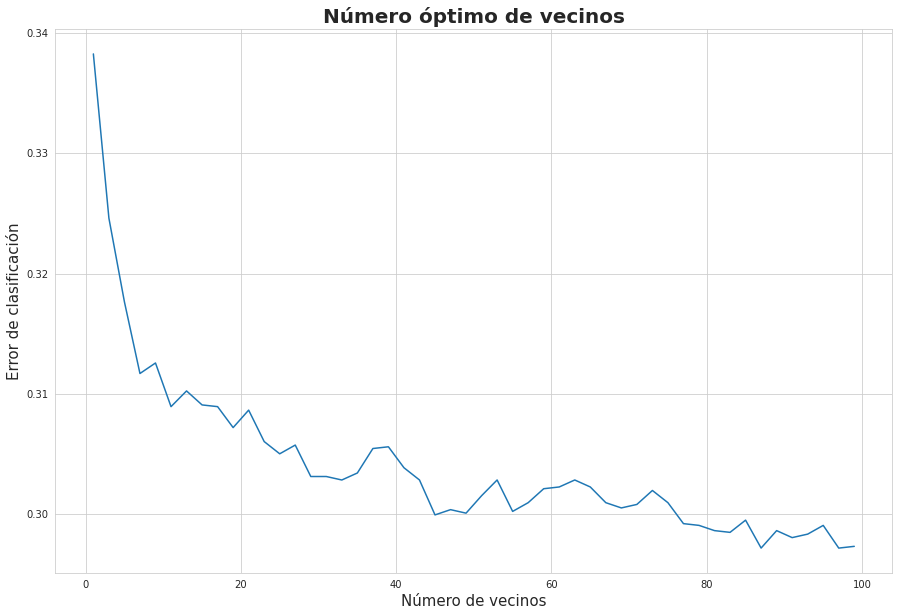

In [ ]:
import seaborn as sns

# changing to misclassification error
MSE = [1 - x for x in cv_scores]

plt.figure()
plt.figure(figsize=(15,10))
plt.title('Número óptimo de vecinos', fontsize=20, fontweight='bold')
plt.xlabel('Número de vecinos', fontsize=15)
plt.ylabel('Error de clasificación', fontsize=15)
sns.set_style("whitegrid")
plt.plot(k_list, MSE)

plt.show()

In [ ]:
# finding best k
best_k = k_list[MSE.index(min(MSE))]
print("El número optimo de vecinos es %d." % best_k)

El número optimo de vecinos es 97.


Ahora corremos el algoritmo con el valor optimo de vecinos obtenido

In [ ]:
#KNN
from sklearn.neighbors import KNeighborsClassifier

model_name = 'KNN'
neigh = KNeighborsClassifier(n_neighbors=97,weights='distance')
neigh.fit(X_train,y_train)
predicciones_train = neigh.predict_proba(X_test)

In [ ]:
predicciones_train

array([[0.45949826, 0.54050174, 0.        , 0.        , 0.        ],
       [0.44156498, 0.55843502, 0.        , 0.        , 0.        ],
       [0.26321228, 0.73678772, 0.        , 0.        , 0.        ],
       ...,
       [0.89895211, 0.09980359, 0.0012443 , 0.        , 0.        ],
       [0.62035896, 0.37964104, 0.        , 0.        , 0.        ],
       [0.40922137, 0.59077863, 0.        , 0.        , 0.        ]])

In [ ]:
from sklearn.metrics import log_loss
log_loss(y_test, predicciones_train)

0.8026639810530249

In [ ]:
# Usando el set de test otorgado
predicciones_test = neigh.predict_proba(test_set_features[['Total_Taxable_Amount_USD',
                            'Bureaucratic_Code_0_Approved', 
                            'Products_Per_Op',
                            'TRF_Per_Op',
                            'Daily_Dif_Account_Created_Opportunity_Created_Date',
                            #'Daily_Dif_Delivery_Start_Delivery_End_Date',
                            'Opp_Owner_Did_Last_Modifiy',
                            'Pricing, Delivery_Terms_Approved',
                            'Bureaucratic_Code_0_Approval',
                            'Last_Modified_date>Planned_Delivery_End_Date',
                            'Op_Has_A_Valid_Quote_Expiry_Date']])

In [ ]:
predicciones_test

array([[0.75527305, 0.24472695, 0.        , 0.        , 0.        ],
       [0.76372599, 0.22882118, 0.        , 0.00745283, 0.        ],
       [0.21630122, 0.78369878, 0.        , 0.        , 0.        ],
       ...,
       [0.34225943, 0.65774057, 0.        , 0.        , 0.        ],
       [0.54240132, 0.42826941, 0.00632379, 0.02300548, 0.        ],
       [0.67021595, 0.32978405, 0.        , 0.        , 0.        ]])

Nos quedamos unicamente con las probabilidades de exito


In [ ]:
predicciones_exito = []
for prob in predicciones_test:
  predicciones_exito.append(prob[1])

In [ ]:
#Habria que subirlo a kaggle para poder analizar las predicciones hechas
csv_kaggle = pd.DataFrame()
csv_kaggle['Opportunity_ID'] = test_set_features["Opportunity_ID"]
csv_kaggle['target'] = predicciones_exito
#csv_kaggle =  csv_kaggle.drop_duplicates(subset="Opportunity_ID")